In [1]:
#%matplotlib inline
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import gc
from gan_utils import *

# Set random seem for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [2]:
ngpu = 0
nz = 32
ngf = 128
ndf = 64
nc = 3
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
mask_sizes = [2,4,8,16,32]
print('device:', device)

device: cpu


In [3]:
# Create the Generator
netG = Generator(ngpu, ngf, nz, nc, mask_sizes=[2,4,8,16,32]).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

checkpoint = torch.load("model_checkpoints/GAN_z22_mask", map_location='cpu')
netG.load_state_dict(checkpoint['netG_state_dict'])

In [4]:
def resize_mask(mask, sizes=None, transform=None, device=None):
    my_mask = mask
    if len(my_mask.shape)<3:
        my_mask = np.expand_dims(my_mask, axis=-1)
    masks = []
    for size in sizes:
        new_size1 = int(mask.shape[0]/64) * size
        new_size2 = int(mask.shape[1]/64) * size
        scaled_mask = resize(my_mask, (new_size1, new_size2), mode='constant').astype('float32')
        if transform is not None:
            scaled_mask = transform(scaled_mask).unsqueeze(0)
        masks.append(scaled_mask.to(device))
    return masks
                                       
def show_image_mask(image_tensor, mask, figsize=(6,4)):
    image_array = image_tensor.numpy().transpose(1,2,0)
    image_array = (image_array + 1)/2
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    plt.imshow(image_array)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.show()
    
my_transform = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

/Users/Qinghui/MachineLearning/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


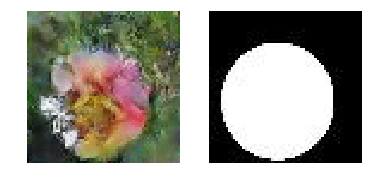

In [5]:
mask = io.imread("test_masks/test1.jpg", is_gray=True)
masks = resize_mask(mask, sizes=mask_sizes, transform=my_transform, device=device)
fixed_noise = torch.randn(1, 32, 2, 2, device=device)
image = netG(fixed_noise, masks)
show_image_mask(image[0].detach().cpu(), mask)

/Users/Qinghui/MachineLearning/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


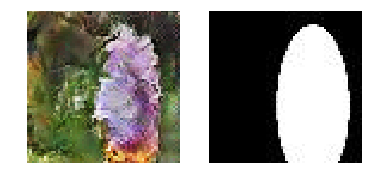

In [6]:
mask = io.imread("test_masks/test2.jpg", is_gray=True)
masks = resize_mask(mask, sizes=mask_sizes, transform=my_transform, device=device)
fixed_noise = torch.randn(1, 32, 2, 2, device=device)
image = netG(fixed_noise, masks)
show_image_mask(image[0].detach().cpu(), mask)

/Users/Qinghui/MachineLearning/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


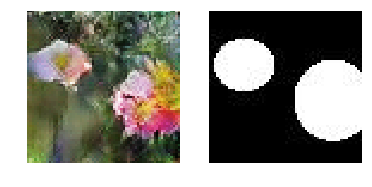

In [7]:
mask = io.imread("test_masks/test3.jpg", is_gray=True)
masks = resize_mask(mask, sizes=mask_sizes, transform=my_transform, device=device)
fixed_noise = torch.randn(1, 32, 2, 2, device=device)
image = netG(fixed_noise, masks)
show_image_mask(image[0].detach().cpu(), mask)

/Users/Qinghui/MachineLearning/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


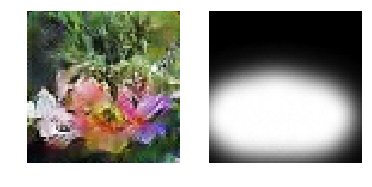

In [8]:
mask = io.imread("test_masks/test4.jpg", is_gray=True)
masks = resize_mask(mask, sizes=mask_sizes, transform=my_transform, device=device)
fixed_noise = torch.randn(1, 32, 2, 2, device=device)
image = netG(fixed_noise, masks)
show_image_mask(image[0].detach().cpu(), mask)

/Users/Qinghui/MachineLearning/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


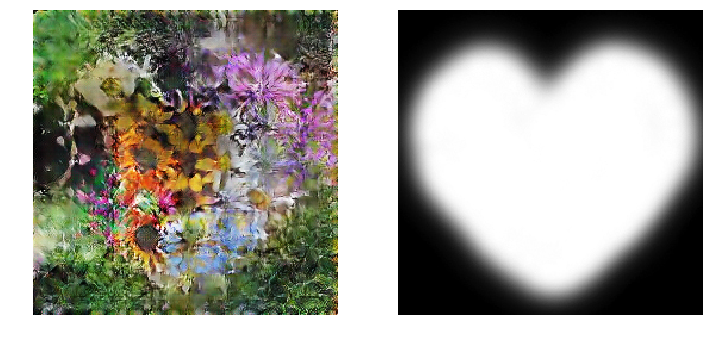

In [9]:
mask = io.imread("test_masks/test6.jpg", is_gray=True)
masks = resize_mask(mask, sizes=mask_sizes, transform=my_transform, device=device)
fixed_noise = torch.randn(1, 32, 8, 8, device=device)
image = netG(fixed_noise, masks)
show_image_mask(image[0].detach().cpu(), mask, figsize=(12,6))

/Users/Qinghui/MachineLearning/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


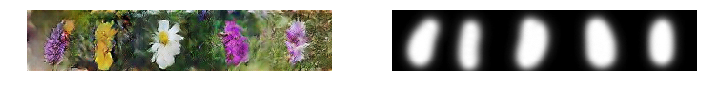

In [10]:
mask = io.imread("test_masks/test7.jpg", is_gray=True)
masks = resize_mask(mask, sizes=mask_sizes, transform=my_transform, device=device)
fixed_noise = torch.randn(1, 32, 2, 10, device=device)
image = netG(fixed_noise, masks)
show_image_mask(image[0].detach().cpu(), mask, figsize=(12,6))

/Users/Qinghui/MachineLearning/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


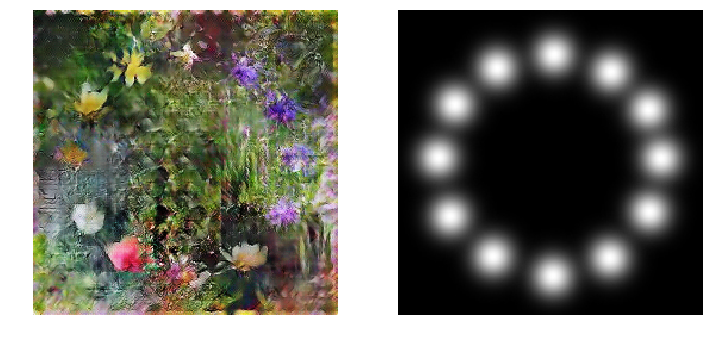

In [11]:
mask = io.imread("test_masks/test8.jpg", is_gray=True)
masks = resize_mask(mask, sizes=mask_sizes, transform=my_transform, device=device)
fixed_noise = torch.randn(1, 32, 8, 8, device=device)
image = netG(fixed_noise, masks)
show_image_mask(image[0].detach().cpu(), mask, figsize=(12,6))